In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
df = pd.read_csv("q1data.csv")
print(df)

   fruitid  weight  sweetness   label
0        1     180          7   Apple
1        2     200          6   Apple
2        3     150          4  Orange
3        4     170          5  Orange
4        5     160          6   Apple
5        6     140          3  Orange


In [21]:
x = df["weight"]
y = df["sweetness"]
z = df["fruitid"]
l = df["label"]
def knearest(k,w,s):
    d = {}
    for i in range(len(x)):
        d[z[i]] = (x[i]-w)**2 + (y[i]-s)**2
    sorted_d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
    count_apple = 0
    count_orange = 0
    for i,j in sorted_d.items():
        if(l[i-1]=='Apple'):
            count_apple +=1
        else:
            count_orange +=1
        k = k-1
        if k==0:
            break
    if count_apple==count_orange:
        print("Ambiguous")
    elif count_apple>count_orange:
        print("Classified as : Apple")
    else:
        print("Classified as : Orange")
            

knearest(3,165,5.5)
        
    

Classified as : Apple


In [18]:
import math
w = 165
s = 5.5
df["Manhattan"] = [abs(x[i]-w)+abs(y[i]-s) for i in range(len(x))]
df["Euclidean"] = [((x[i]-w)**2+(y[i]-s)**2)**0.5 for i in range(len(x))]
p = 3
df["Minkowski"] = [((abs(x[i]-w))**p+(abs(y[i]-s))**p)**(1/p) for i in range(len(x))]
print(df)

   fruitid  weight  sweetness   label  Manhattan  Euclidean  Minkowski
0        1     180          7   Apple       16.5  15.074813  15.004998
1        2     200          6   Apple       35.5  35.003571  35.000034
2        3     150          4  Orange       16.5  15.074813  15.004998
3        4     170          5  Orange        5.5   5.024938   5.001666
4        5     160          6   Apple        5.5   5.024938   5.001666
5        6     140          3  Orange       27.5  25.124689  25.008331


In [22]:
knearest(1,165,5.5)

Classified as : Orange


In [24]:
knearest(5,165,5.5)

Classified as : Orange


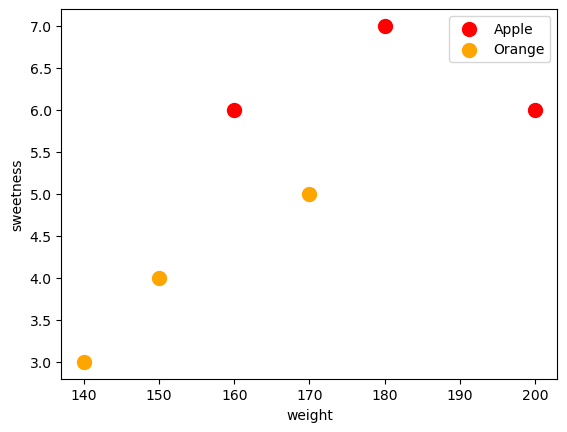

In [35]:
apples_x=[]
apples_y = []
orange_x = []
orange_y=[]
for i in range(len(x)):
    if(l[i]=="Apple"):
        apples_x.append(x[i])
        apples_y.append(y[i])
    else:
        orange_x.append(x[i])
        orange_y.append(y[i])
plt.scatter(apples_x,apples_y,color = 'red',label = "Apple",s=100)
plt.scatter(orange_x,orange_y,color = 'orange',label = "Orange",s=100)
plt.xlabel("weight")
plt.ylabel("sweetness")
plt.legend()
plt.show()